In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns



In [5]:
titanic = pd.read_csv('titanic_data.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S


The passengers embarked from three different ports in three separate regions: Southampton in England, Queenstown in Ireland (that was part of UK) and Cherbourg in France. Can we infere wealth differences between these regions based on passenger data from this dataset?

Using the fare for this question is complicated, because some passengers paid for their companions (family members, maids, nurses...), and prices varied greatly even for the same class: https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#Passengers

Thus, using the passenger class is a more straightforward way.

For each passenger, we need the class and the port they embarked from. Unfortunately, we do not always know the port, so we will drop these rows:

In [8]:
class_port = titanic[['PassengerId', 'Pclass', 'Embarked']]
print class_port.isnull().any()
print
class_port = class_port.dropna()
print class_port.isnull().any()

PassengerId    False
Pclass         False
Embarked        True
dtype: bool

PassengerId    False
Pclass         False
Embarked       False
dtype: bool


We need the number of passengers for each port of embarkment and class:

In [9]:
passengers_by_port_class = class_port.groupby(['Embarked', 'Pclass'], as_index=False).count()
print passengers_by_port_class

  Embarked  Pclass  PassengerId
0        C       1           85
1        C       2           17
2        C       3           66
3        Q       1            2
4        Q       2            3
5        Q       3           72
6        S       1          127
7        S       2          164
8        S       3          353


and the total number of passengers for each port:

In [10]:
passengers_by_port_class['Total'] = passengers_by_port_class.groupby('Embarked')['PassengerId'].transform(sum)
print passengers_by_port_class

  Embarked  Pclass  PassengerId  Total
0        C       1           85    168
1        C       2           17    168
2        C       3           66    168
3        Q       1            2     77
4        Q       2            3     77
5        Q       3           72     77
6        S       1          127    644
7        S       2          164    644
8        S       3          353    644


Now we can calculate the percentage of each class per port:

In [11]:
passengers_by_port_class['Percent'] = passengers_by_port_class.PassengerId * 100 / passengers_by_port_class.Total
print passengers_by_port_class

  Embarked  Pclass  PassengerId  Total    Percent
0        C       1           85    168  50.595238
1        C       2           17    168  10.119048
2        C       3           66    168  39.285714
3        Q       1            2     77   2.597403
4        Q       2            3     77   3.896104
5        Q       3           72     77  93.506494
6        S       1          127    644  19.720497
7        S       2          164    644  25.465839
8        S       3          353    644  54.813665


We can use a stacked bars chart to visualize the results:

Populating the interactive namespace from numpy and matplotlib


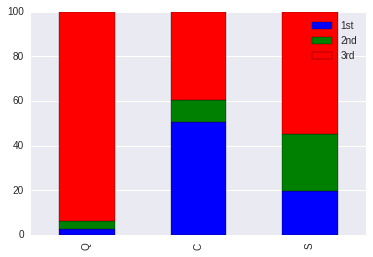

In [13]:
%pylab inline

c_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'C']['Percent']
q_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'Q']['Percent']
s_percents = passengers_by_port_class.loc[passengers_by_port_class['Embarked'] == 'S']['Percent']

class_port_percents = pd.DataFrame.from_dict({'C':c_percents.values, 'Q':q_percents.values, 'S':s_percents.values}, orient='index')
class_port_percents.columns = ['1st', '2nd', '3rd']
class_port_percents.plot(kind='bar', stacked=True)

The graph shows that more than 90% of the passengers that embarked from Queenstown in Ireland where third class passengers, in contrast with the other ports, where third class made up for 40-55% of the total number of passengers.
The Maddison Project Database (http://www.ggdc.net/maddison/maddison-project/data.htm) shows that Ireland had an estimated GDP per capita of 2.736 (in 1990 International Geary-Khamis Dollars) by 1913 (no data for 1912), while the UK had a GDP of 4.762 and France's was 3.514 by 1912.
Our passenger data coincides with the Maddison Project in the case of Ireland: it was a poor country compared to Europe's average by the year the Titanic sank. However, our data cannot explain why 1st class percentage in Cherbourg doubles Southampton's, being the UK a richer country than France during that time. Maybe the Cherbourg region was wealthier than the average of France, or Southampton was specially poor, but we do not have the data to check this.
Of course, there are other problems. For instance, we do not know if Titanic passengers make a representative sample of the demography of these regions.